<a href="https://colab.research.google.com/github/jkmolina30/Data_Science-Challenge_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [80]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

# Unimos todos los archivos en uno solo
dfppal = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
dfppal.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
# Ingreso total por tienda
ingreso_tienda_1 = tienda['Precio'].sum()
ingreso_tienda_2 = tienda2['Precio'].sum()
ingreso_tienda_3 = tienda3['Precio'].sum()
ingreso_tienda_4 = tienda4['Precio'].sum()

ingreso_totales = ingreso_tienda_1 + ingreso_tienda_2 + ingreso_tienda_3 + ingreso_tienda_4

# Mostramos los resultados
print(f'Ingreso total Tienda 1: ${ingreso_tienda_1:,.0f}')
print(f'Ingreso total Tienda 2: ${ingreso_tienda_2:,.0f}')
print(f'Ingreso total Tienda 3: ${ingreso_tienda_3:,.0f}')
print(f'Ingreso total Tienda 4: ${ingreso_tienda_4:,.0f}')
print("")
print(f'Ingresos totales: ${ingreso_totales}')


Ingreso total Tienda 1: $1,150,880,400
Ingreso total Tienda 2: $1,116,343,500
Ingreso total Tienda 3: $1,098,019,600
Ingreso total Tienda 4: $1,038,375,700

Ingresos totales: $4403619200.0


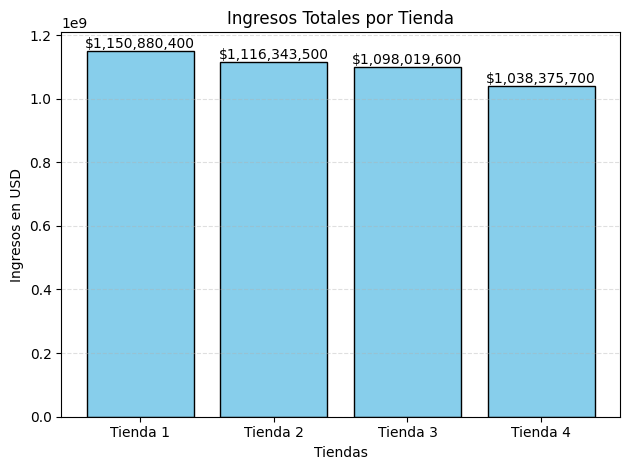

In [3]:
import matplotlib.pyplot as plt

lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_facturacion = [ingreso_tienda_1, ingreso_tienda_2, ingreso_tienda_3, ingreso_tienda_4]

plt.bar(lista_tienda, lista_facturacion, color='skyblue', edgecolor='black')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos en USD')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Mostrar valores encima de cada barra
for i, valor in enumerate(lista_facturacion):
    plt.text(i, valor, f'${valor:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [12]:
  tienda["Tienda"] = "Tienda 1"
  tienda2["Tienda"] = "Tienda 2"
  tienda3["Tienda"] = "Tienda 3"
  tienda4["Tienda"] = "Tienda 4"

  dfppal2 = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
  ventas_categoria = dfppal2.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad de Ventas")

  ventas_categoria = ventas_categoria.sort_values(by=["Tienda", "Categoría del Producto"], ascending=[True, False])

  print(ventas_categoria)

      Tienda   Categoría del Producto  Cantidad de Ventas
7   Tienda 1                  Muebles                 465
6   Tienda 1                   Libros                 173
5   Tienda 1                 Juguetes                 324
4   Tienda 1   Instrumentos musicales                 182
3   Tienda 1             Electrónicos                 448
2   Tienda 1        Electrodomésticos                 312
1   Tienda 1     Deportes y diversión                 284
0   Tienda 1  Artículos para el hogar                 171
15  Tienda 2                  Muebles                 442
14  Tienda 2                   Libros                 197
13  Tienda 2                 Juguetes                 313
12  Tienda 2   Instrumentos musicales                 224
11  Tienda 2             Electrónicos                 422
10  Tienda 2        Electrodomésticos                 305
9   Tienda 2     Deportes y diversión                 275
8   Tienda 2  Artículos para el hogar                 181
23  Tienda 3  

# 3. Calificación promedio de la tienda


In [81]:
# Calcular promedios
promedio_tienda_1 = tienda['Calificación'].mean()
promedio_tienda_2 = tienda2['Calificación'].mean()
promedio_tienda_3 = tienda3['Calificación'].mean()
promedio_tienda_4 = tienda4['Calificación'].mean()

# Guardar en listas
lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_prome = [promedio_tienda_1, promedio_tienda_2, promedio_tienda_3, promedio_tienda_4]

# Calcular el total para porcentajes
total_promedios = sum(lista_prome)

# Calcular el porcentaje respecto al total
porcentajes = [(p / total_promedios) * 100 for p in lista_prome]

# Imprimir resultados
for tienda, promedio, porcentaje in zip(lista_tienda, lista_prome, porcentajes):
    print(f"{tienda}: Promedio = {promedio:.4f}, Porcentaje del total = {porcentaje:.2f}%")



Tienda 1: Promedio = 3.9767, Porcentaje del total = 24.76%
Tienda 2: Promedio = 4.0373, Porcentaje del total = 25.14%
Tienda 3: Promedio = 4.0483, Porcentaje del total = 25.21%
Tienda 4: Promedio = 3.9958, Porcentaje del total = 24.88%


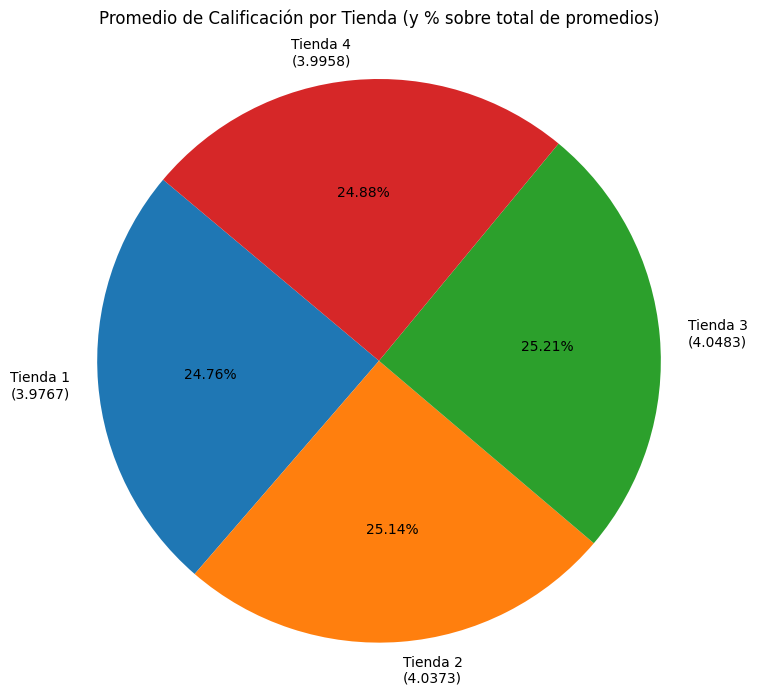

In [83]:
"""import matplotlib.pyplot as plt

lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_promedio = [promedio_tienda_1, promedio_tienda_2, promedio_tienda_3, promedio_tienda_4]

plt.figure(figsize=(8, 8))
plt.pie(lista_promedio, labels=lista_tienda, autopct='%1.2f%%', startangle=140)
plt.title("Promedio de Calificación por Tienda")
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()"""

# Gráfico de pastel con valor + porcentaje
plt.figure(figsize=(8, 8))
plt.pie(
    lista_prome,
    labels=[f"{t}\n({p:.4f})" for t, p in zip(lista_tienda, lista_prome)],
    autopct=lambda pct: f"{pct:.2f}%",
    startangle=140
)
plt.title("Promedio de Calificación por Tienda (y % sobre total de promedios)\n")
plt.axis('equal')
plt.show()


# 4. Productos más y menos vendidos

In [6]:
# Contar cuántas veces se vendió cada producto
ventas_por_producto = dfppal['Producto'].value_counts().reset_index()
ventas_por_producto.columns = ['Producto', 'Cantidad Vendida']

# Producto más vendido
producto_mas_vendido = ventas_por_producto.iloc[0]
print(f"📈 Producto más vendido: {producto_mas_vendido['Producto']} - {producto_mas_vendido['Cantidad Vendida']} unidades")

# Producto menos vendido
producto_menos_vendido = ventas_por_producto.iloc[-1]
print(f"📉 Producto menos vendido: {producto_menos_vendido['Producto']} - {producto_menos_vendido['Cantidad Vendida']} unidad(es)")

📈 Producto más vendido: Mesa de noche - 210 unidades
📉 Producto menos vendido: Celular ABXY - 157 unidad(es)


Top 10 productos más vendidos:
                    Producto  Cantidad Vendida
0              Mesa de noche               210
1  Carrito de control remoto               206
2                 Microondas               206
3                    Batería               203
4                  Cama king               201
5           Secadora de ropa               200
6        Modelado predictivo               200
7               Set de ollas               200
8                   Cama box               199
9    Bloques de construcción               199


<ipython-input-7-8154e3423d07>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')


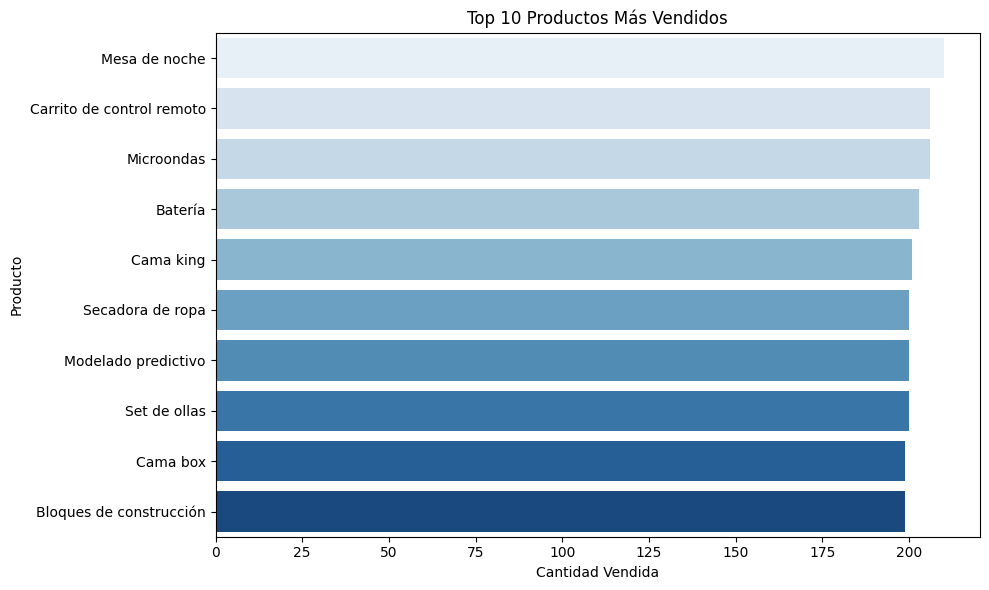

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#TOP 10 DE PRODUCTOS MAS VENDIDOS
print("Top 10 productos más vendidos:")
print(ventas_por_producto.head(10))



top_10 = ventas_por_producto.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Top 10 productos más vendidos:
                       Producto  Cantidad Vendida
41              Olla de presión               172
42                   Smartwatch               172
43                 Set de vasos               169
44                       Sillón               168
45            Asistente virtual               167
46  Ciencia de datos con Python               166
47           Guitarra eléctrica               165
48                      Mochila               163
49    Auriculares con micrófono               158
50                 Celular ABXY               157


<ipython-input-8-3f10f7ab0379>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')


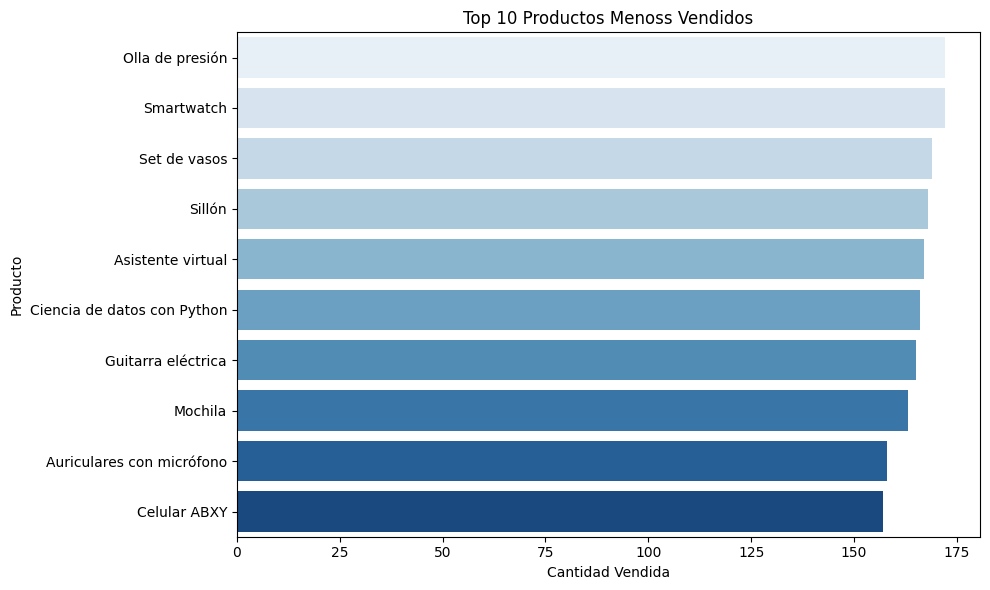

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#TOP 10 DE PRODUCTOS MENOS VENDIDOS
print("Top 10 productos más vendidos:")
print(ventas_por_producto.tail(10))



top_10 = ventas_por_producto.tail(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cantidad Vendida', y='Producto', data=top_10, palette='Blues')
plt.title('Top 10 Productos Menoss Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [9]:
# Ingreso total por tienda
promedio_costo_tienda_1 = tienda['Costo de envío'].mean()
promedio_costo_tienda_2 = tienda2['Costo de envío'].mean()
promedio_costo_tienda_3 = tienda3['Costo de envío'].mean()
promedio_costo_tienda_4 = tienda4['Costo de envío'].mean()

# Mostramos los resultados
print(f'Promedio Envío por Tienda 1: {promedio_costo_tienda_1}')
print(f'Promedio Envío por Tienda 2: {promedio_costo_tienda_2}')
print(f'Promedio Envío por Tienda 3: {promedio_costo_tienda_3}')
print(f'Promedio Envío por Tienda 4: {promedio_costo_tienda_4}')

Promedio Envío por Tienda 1: 26018.60958033065
Promedio Envío por Tienda 2: 25216.235693090293
Promedio Envío por Tienda 3: 24805.680373039424
Promedio Envío por Tienda 4: 23459.457167090754


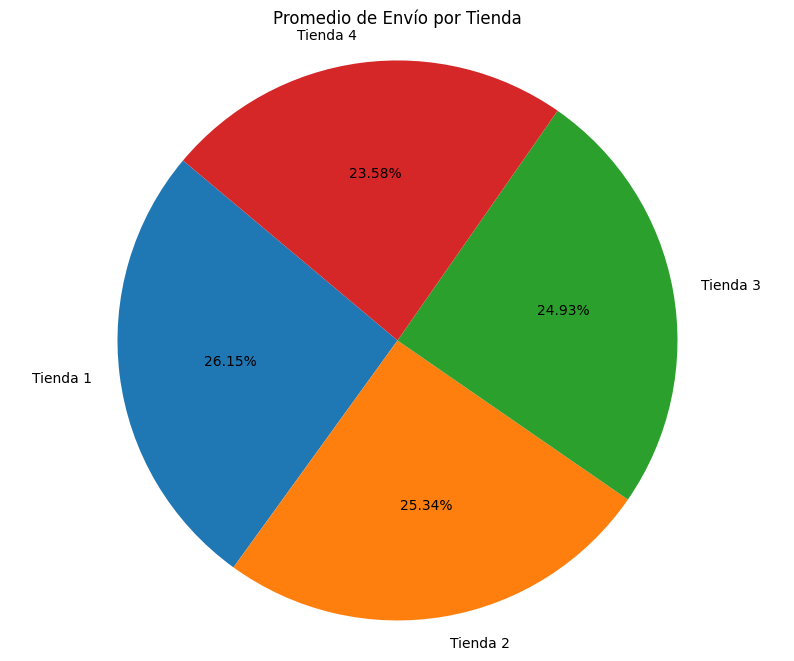

In [10]:
import matplotlib.pyplot as plt

lista_tienda = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
lista_promedio = [promedio_costo_tienda_1, promedio_costo_tienda_2, promedio_costo_tienda_3, promedio_costo_tienda_4]

plt.figure(figsize=(10, 8))
plt.pie(lista_promedio, labels=lista_tienda, autopct='%1.2f%%', startangle=140)
plt.title("Promedio de Envío por Tienda")
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.show()

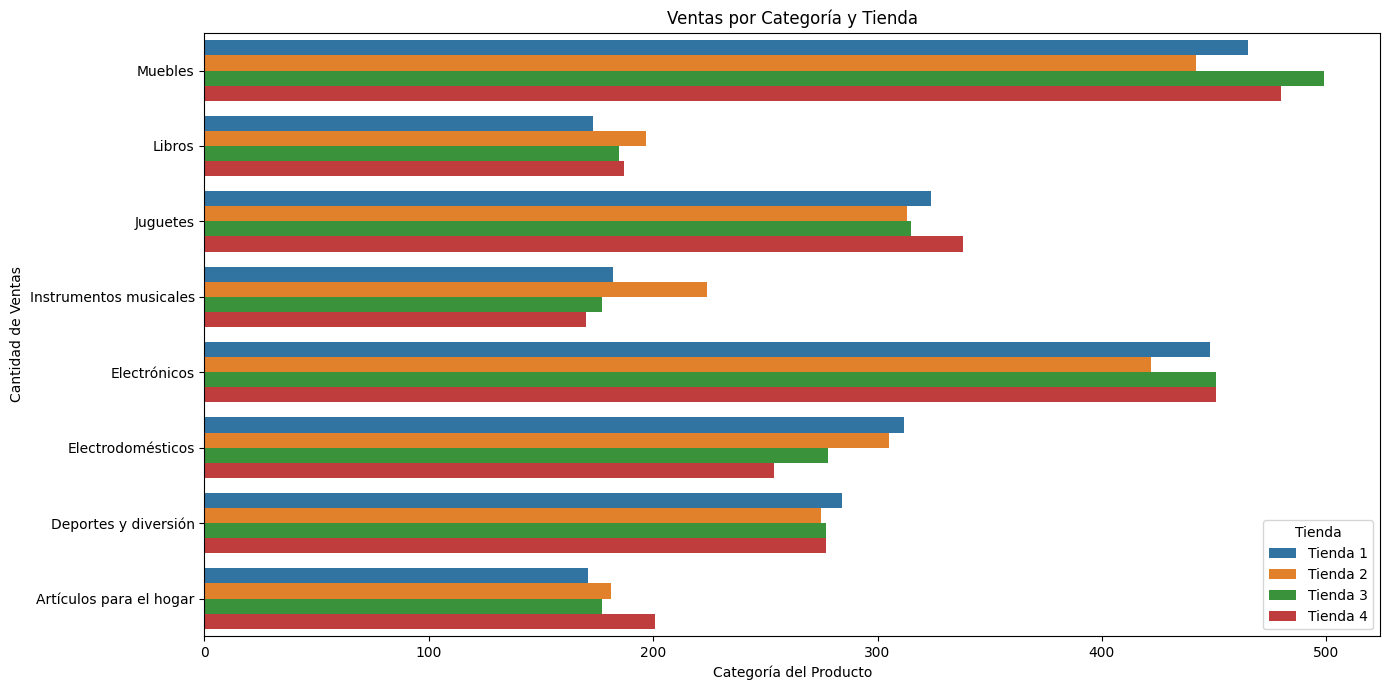

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.barplot(data=ventas_categoria,
            y="Categoría del Producto",
            x="Cantidad de Ventas",
            hue="Tienda")

plt.title("Ventas por Categoría y Tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Cantidad de Ventas")
plt.xticks(rotation=0)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


#6 ANALISIS

De acuerdo con la grafica numero 1-Analisis de Facturación. En la cual se puede evidenciar que es la tienda que menos facturacion o menos ventas registro

Ingreso total Tienda 1: 1.150.880.400
Ingreso total Tienda 2: 1.116.343.500
Ingreso total Tienda 3: 1.098.019.600
**Ingreso total Tienda 4: 1.038.375.700**

Ademas con la grafica del promedio de envio, tambien podemos observar que es la tienda que tuvo el promedio mas bajo de envios.

Promedio Envío por Tienda 1: 26.15
Promedio Envío por Tienda 2: 25.34
Promedio Envío por Tienda 3: 24.93
Promedio Envío por Tienda 4: 23.58


Por ultimo en el promedio de las calificaciones de cada tienda, la tienda # 4 ocupa el segundo lugar con peor promedio de calificacion por debajo de la tienda # 1

Tienda 1: Promedio = 3.9767, Porcentaje del total = 24.76%
Tienda 2: Promedio = 4.0373, Porcentaje del total = 25.14%
Tienda 3: Promedio = 4.0483, Porcentaje del total = 25.21%
Tienda 4: Promedio = 3.9958, Porcentaje del total = 24.88%


De acuerdo con estos datos, yo le recomendaría al Señor Juan que debe de vender la Tienda 4 para invertir en un nuevo negocio.